In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


## Data import

In [49]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
banknote_authentication = fetch_ucirepo(id=267) 
  
# data (as pandas dataframes) 
x = banknote_authentication.data.features 
y = banknote_authentication.data.targets 

In [50]:
# metadata 
banknote_authentication.metadata

{'uci_id': 267,
 'name': 'Banknote Authentication',
 'repository_url': 'https://archive.ics.uci.edu/dataset/267/banknote+authentication',
 'data_url': 'https://archive.ics.uci.edu/static/public/267/data.csv',
 'abstract': 'Data were extracted from images that were taken for the evaluation of an authentication procedure for banknotes.',
 'area': 'Computer Science',
 'tasks': ['Classification'],
 'characteristics': ['Multivariate'],
 'num_instances': 1372,
 'num_features': 4,
 'feature_types': ['Real'],
 'demographics': [],
 'target_col': ['class'],
 'index_col': None,
 'has_missing_values': 'no',
 'missing_values_symbol': None,
 'year_of_dataset_creation': 2012,
 'last_updated': 'Fri Feb 16 2024',
 'dataset_doi': '10.24432/C55P57',
 'creators': ['Volker Lohweg'],
 'intro_paper': None,
 'additional_info': {'summary': 'Data were extracted from images that were taken from genuine and forged banknote-like specimens.  For digitization, an industrial camera usually used for print inspection w

In [51]:
# variable information 
banknote_authentication.variables

,name,role,type,demographic,description,units,missing_values
0,variance,Feature,Continuous,None,variance of Wavelet Transformed image,None,no
1,skewness,Feature,Continuous,None,skewness of Wavelet Transformed image,None,no
2,curtosis,Feature,Continuous,None,curtosis of Wavelet Transformed image,None,no
3,entropy,Feature,Continuous,None,entropy of image,None,no
4,class,Target,Integer,None,None,None,no


## Data exploration

In [52]:
df = pd.concat([x, y], axis=1)
df.head(10)

,variance,skewness,curtosis,entropy,class
0,3.62160,8.6661,-2.80730,-0.44699,0
1,4.54590,8.1674,-2.45860,-1.46210,0
2,3.86600,-2.6383,1.92420,0.10645,0
3,3.45660,9.5228,-4.01120,-3.59440,0
4,0.32924,-4.4552,4.57180,-0.98880,0
5,4.36840,9.6718,-3.96060,-3.16250,0
6,3.59120,3.0129,0.72888,0.56421,0
7,2.09220,-6.8100,8.46360,-0.60216,0
8,3.20320,5.7588,-0.75345,-0.61251,0
9,1.53560,9.1772,-2.27180,-0.73535,0


In [53]:
df.tail(10)

,variance,skewness,curtosis,entropy,class
1362,-2.16680,1.59330,0.045122,-1.67800,1
1363,-1.16670,-1.42370,2.924100,0.66119,1
1364,-2.83910,-6.63000,10.484900,-0.42113,1
1365,-4.50460,-5.81260,10.886700,-0.52846,1
1366,-2.41000,3.74330,-0.402150,-1.29530,1
1367,0.40614,1.34920,-1.450100,-0.55949,1
1368,-1.38870,-4.87730,6.477400,0.34179,1
1369,-3.75030,-13.45860,17.593200,-2.77710,1
1370,-3.56370,-8.38270,12.393000,-1.28230,1
1371,-2.54190,-0.65804,2.684200,1.19520,1


**note: data is sorted by class**

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   variance  1372 non-null   float64
 1   skewness  1372 non-null   float64
 2   curtosis  1372 non-null   float64
 3   entropy   1372 non-null   float64
 4   class     1372 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 53.7 KB


In [55]:
df.describe()

,variance,skewness,curtosis,entropy,class
count,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.397627,-1.191657,0.444606
std,2.842763,5.869047,4.310030,2.101013,0.497103
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.773000,-1.708200,-1.574975,-2.413450,0.000000
50%,0.496180,2.319650,0.616630,-0.586650,0.000000
75%,2.821475,6.814625,3.179250,0.394810,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


In [56]:
df["class"].value_counts()

class
0    762
1    610
Name: count, dtype: int64

In [57]:
#shape of data
df.shape

(1372, 5)

In [58]:
#number of duplicates
df.duplicated().sum()

24

In [59]:
#remove duplicates
df.drop_duplicates(inplace=True)

In [60]:
#make sure duplicates have removed successfully
df.duplicated().sum()

0

In [61]:
df.isnull().sum()

variance    0
skewness    0
curtosis    0
entropy     0
class       0
dtype: int64

In [62]:
# IQR-based outlier removal
Q1 = x.quantile(0.25)
Q3 = x.quantile(0.75)
IQR = Q3 - Q1

# Define bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter rows where all features are within bounds
filtered_data = df[~((x < lower_bound) | (x > upper_bound)).any(axis=1)]

# Separate back into x and y
x_clean = filtered_data[x.columns]
y_clean = filtered_data[y.columns[0]]

print(f"Original data shape: {x.shape}")
print(f"Cleaned data shape: {x_clean.shape}")

Original data shape: (1372, 4)
Cleaned data shape: (1259, 4)


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_36036\2915159160.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  filtered_data = df[~((x < lower_bound) | (x > upper_bound)).any(axis=1)]


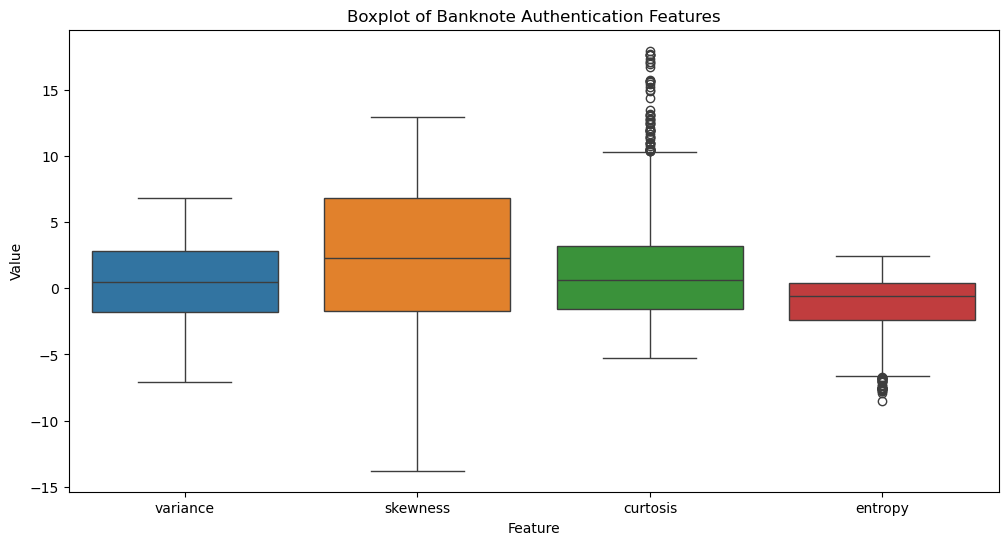

In [63]:
import matplotlib.pyplot as plt
import seaborn as sns
# Set plot size and style
plt.figure(figsize=(12, 6))
sns.boxplot(data=x)
plt.title("Boxplot of Banknote Authentication Features")
plt.xlabel("Feature")
plt.ylabel("Value")
plt.show()

**note: data is nearly balanced**

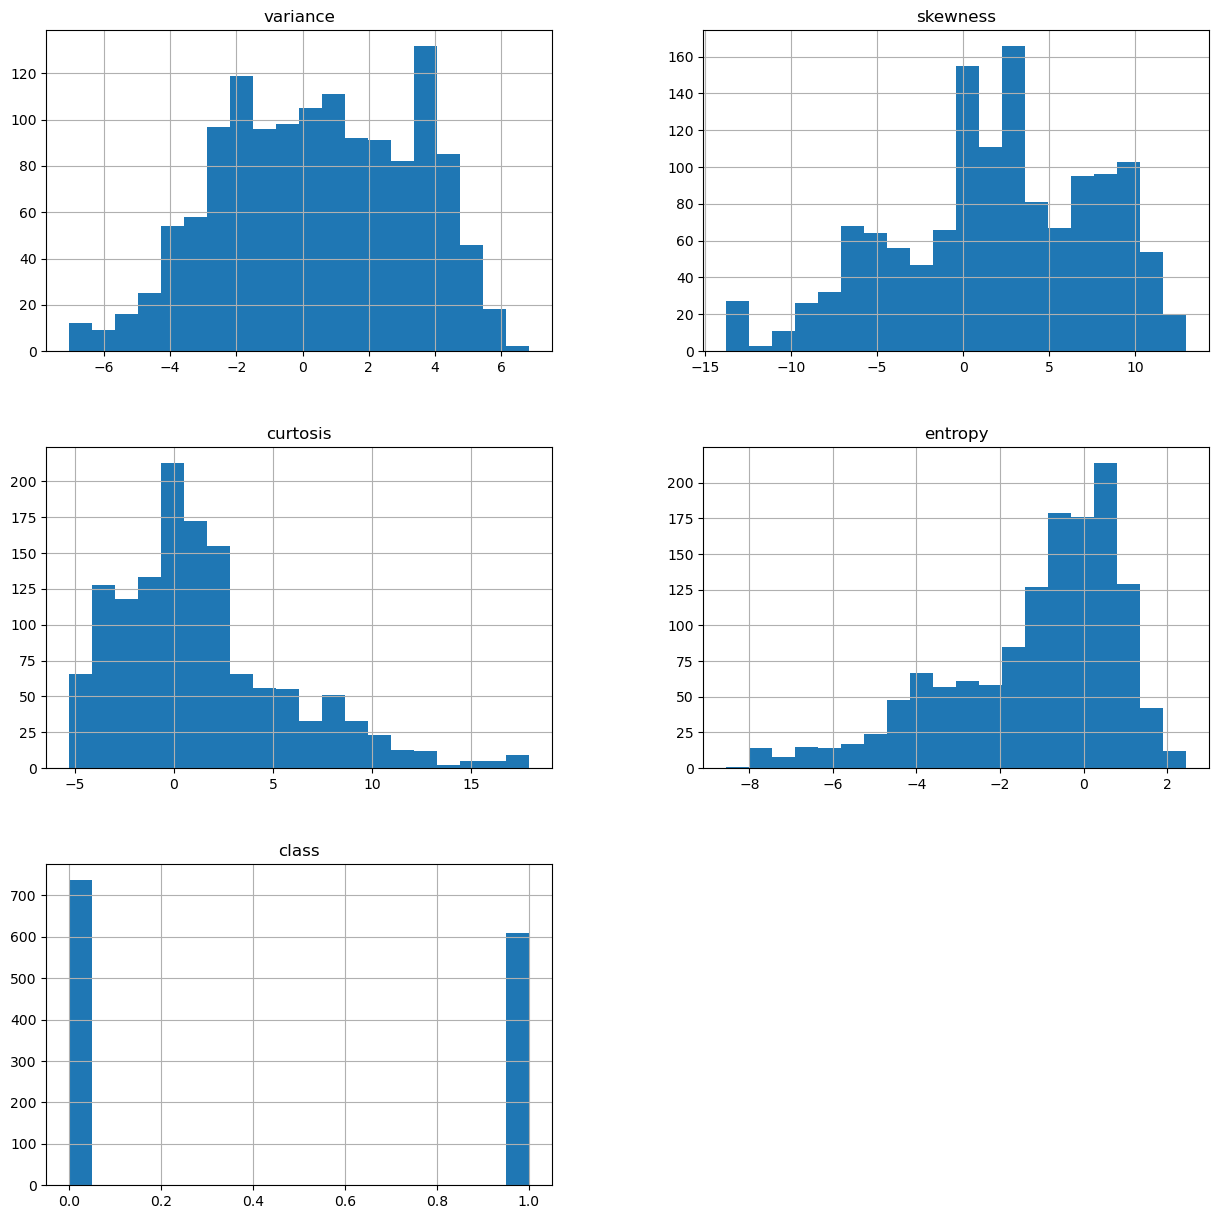

In [64]:
from matplotlib import pyplot as plt
df.hist(bins=20, figsize=(15, 15))
plt.show()

<Axes: >

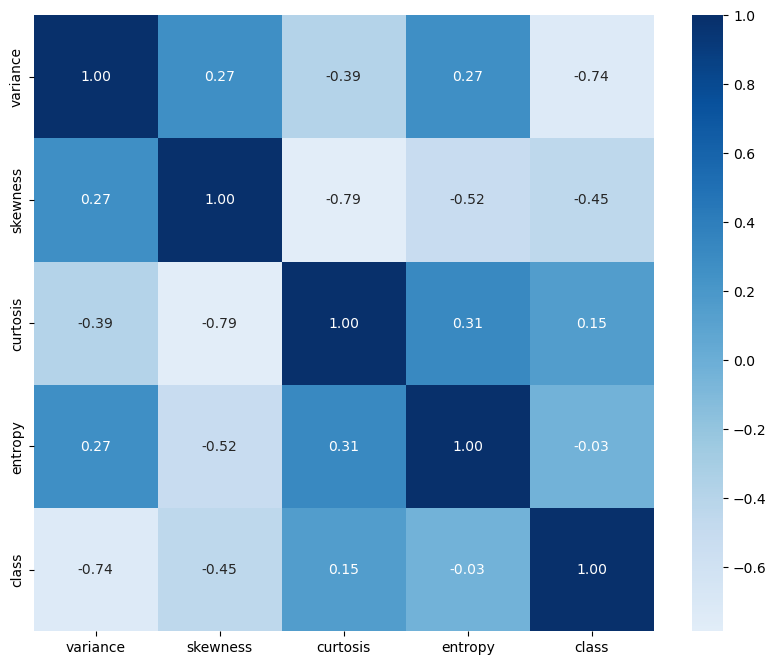

In [65]:
import seaborn as sns
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap="Blues", center=0)

**note: variance is the most correlated feature with class**

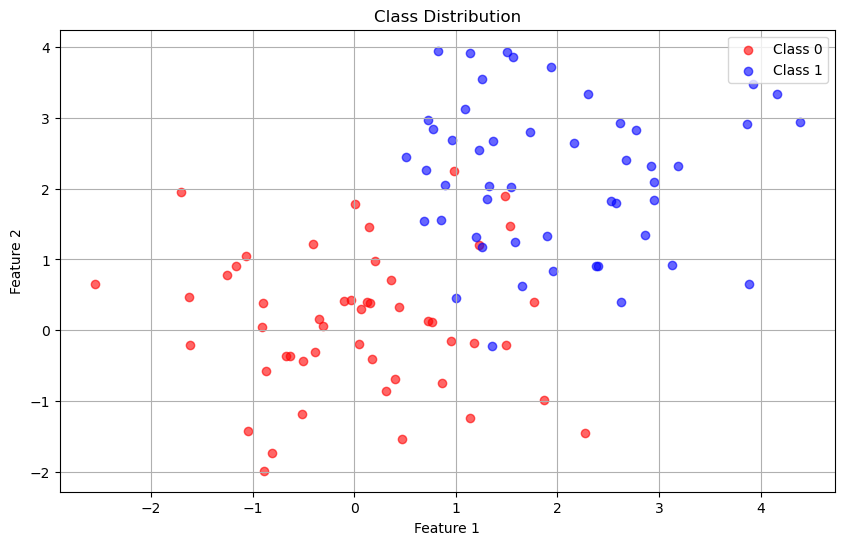

In [66]:

# Sample data: 100 points for two features and binary classes
np.random.seed(0)
x_class0 = np.random.normal(loc=0.0, scale=1.0, size=(50, 2))  # Class -1
x_class1 = np.random.normal(loc=2.0, scale=1.0, size=(50, 2))  # Class 1

x = np.vstack((x_class0, x_class1))   # Shape: (100, 2)
y = np.array([-1]*50 + [1]*50)        # Class labels

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(x[y == -1, 0], x[y == -1, 1], color='red', label='Class 0', alpha=0.6)
plt.scatter(x[y == 1, 0], x[y == 1, 1], color='blue', label='Class 1', alpha=0.6)

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Class Distribution')
plt.legend()
plt.grid(True)
plt.show()


## Data preprocessing

In [67]:
# Convert labels from {0,1} to {-1, +1} for SVM
y = np.where(y == 0, -1, 1)
y = y.reshape(-1)          # OR

In [68]:
# Normalize features (mean 0, std 1 per column)
x = (x - np.mean(x, axis=0)) / np.std(x, axis=0)


In [69]:
x

array([[ 5.39748177e-01, -5.11021528e-01],
       [-1.43255996e-02,  7.55647657e-01],
       [ 6.12775955e-01, -1.45887857e+00],
       [-3.45391272e-02, -8.90536201e-01],
       [-7.77693671e-01, -5.03836541e-01],
       [-6.03239171e-01,  2.14349540e-01],
       [-1.67922695e-01, -7.02654012e-01],
       [-3.91703231e-01, -5.56770520e-01],
       [ 3.49270175e-01, -9.27558424e-01],
       [-4.83985223e-01, -1.37411301e+00],
       [-2.50611469e+00, -3.36606658e-01],
       [-9.49705297e-02, -1.29708991e+00],
       [ 8.96543347e-01, -1.78717791e+00],
       [-6.72583594e-01, -9.15189656e-01],
       [ 3.76574824e-01,  2.24730191e-01],
       [-5.95546023e-01, -5.26156775e-01],
       [-1.33124008e+00, -2.14943174e+00],
       [-9.50335541e-01, -6.78793759e-01],
       [ 1.63155877e-01,  4.10134747e-02],
       [-9.78144320e-01, -9.94406646e-01],
       [-1.44466841e+00, -1.76354214e+00],
       [-1.90871680e+00,  5.56008336e-01],
       [-1.06445024e+00, -1.08783538e+00],
       [-1.

In [70]:
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

## Train, test, validation split 

In [71]:
def train_test_val_split(x,y, test_ratio, val_ratio, random_seed):
    """
    Function to split the dataset into training, testing, and validation sets,
    first shuffling the data indices, then splitting it according to the specified
    test and validation ratios.
    """
    np.random.seed(random_seed)
    indices = np.arange(x.shape[0])
    np.random.shuffle(indices)

    x = x[indices]
    y = y[indices]

    # Calculate total number of samples and split sizes
    n_total = len(x)
    n_test = int(test_ratio* n_total)
    n_val = int(val_ratio* n_total)
    n_train = n_total - n_test - n_val
    # Split into training set
    x_train = x[:n_train]
    y_train = y[:n_train]
    # Split into validation set
    x_val = x[n_train:n_train + n_val]
    y_val = y[n_train:n_train + n_val]
    # Split into test set
    x_test = x[n_train + n_val:]
    y_test = y[n_train + n_val:]

    return x_train, y_train, x_val, y_val, x_test, y_test




In [72]:
x_train, y_train, x_val, y_val, x_test, y_test = train_test_val_split(x,y, test_ratio=0.2, val_ratio=0.2, random_seed=42)

In [73]:
print("test data size:", len(x_train))
print("validation data size:", len(x_val))
print("test data size:", len(x_test))

test data size: 60
validation data size: 20
test data size: 20


## SVM (support vector machine) model from scratch 

In [74]:
class KernelSVM:
    def __init__(self, lambda_param=0.001, learning_rate=0.001, max_iter=500, optimizer='subgradient', delta=1.0, kernel_type='rbf', gamma=10, degree=3):
        # Regularization strength, learning rate, iteration count, and optimization method
        self.lambda_param = lambda_param
        self.learning_rate = learning_rate
        self.max_iter = max_iter
        self.optimizer = optimizer  # 'subgradient' or 'gradient'
        self.delta = delta  # For smooth hinge
        self.kernel_type = kernel_type  # 'linear', 'rbf', 'poly'
        self.gamma = gamma  # RBF gamma
        self.degree = degree  # Polynomial degree

        self.alphas = None  # Dual coefficients
        self.b = 0  # Bias term
        self.X_train = None  # Training data (needed for kernel)
        self.y_train = None  # Training labels

    def kernel(self, x1, x2):
        # Compute kernel between two samples based on kernel type
        if self.kernel_type == 'linear':
            return np.dot(x1, x2)
        elif self.kernel_type == 'rbf':
            return np.exp(-self.gamma * np.linalg.norm(x1 - x2) ** 2)
        elif self.kernel_type == 'poly':
            return (1 + np.dot(x1, x2)) ** self.degree
        else:
            raise ValueError("Unsupported kernel type")

    def compute_kernel_matrix(self, X):
        # Compute the full kernel matrix for all training pairs
        n_samples = X.shape[0]
        K = np.zeros((n_samples, n_samples))
        for i in range(n_samples):
            for j in range(n_samples):
                K[i, j] = self.kernel(X[i], X[j])
        return K

    def fit(self, X_train, y_train, X_val=None, y_val=None, X_test=None, y_test=None):
        n_samples = X_train.shape[0]
        self.alphas = np.zeros(n_samples)
        self.b = 0
        self.X_train = X_train
        self.y_train = y_train
        K = self.compute_kernel_matrix(X_train)

        # Tracking loss and accuracy
        train_losses, train_accuracies = [], []
        val_losses, val_accuracies = [], [] if X_val is not None else None
        test_losses, test_accuracies = [], [] if X_test is not None else None

        for epoch in range(self.max_iter):
            total_loss = 0
            correct = 0

            for i in range(n_samples):
                # Compute prediction using kernel expansion
                f_x = np.sum(self.alphas * self.y_train * K[:, i]) + self.b
                margin = y_train[i] * f_x

                # Gradient update with hinge or smooth hinge loss
                if self.optimizer == 'subgradient':
                    if margin >= 1:
                        d_alpha = self.lambda_param * self.alphas[i]
                        d_b = 0
                    else:
                        d_alpha = self.lambda_param * self.alphas[i] - y_train[i]
                        d_b = -y_train[i]
                elif self.optimizer == 'gradient':  # smooth hinge
                    if margin >= self.delta:
                        d_alpha = self.lambda_param * self.alphas[i]
                        d_b = 0
                    elif 0 < margin < self.delta:
                        d_alpha = self.lambda_param * self.alphas[i] - y_train[i] * (self.delta - margin) / self.delta
                        d_b = -y_train[i] * (self.delta - margin) / self.delta
                    else:
                        d_alpha = self.lambda_param * self.alphas[i] - y_train[i]
                        d_b = -y_train[i]
                else:
                    raise ValueError("Unsupported optimizer type")

                # Parameter updates
                self.alphas[i] -= self.learning_rate * d_alpha
                self.b -= self.learning_rate * d_b

                # Loss and correct predictions
                loss = max(0, 1 - margin)
                total_loss += loss
                if np.sign(f_x) == y_train[i]:
                    correct += 1

            # Epoch-level training stats
            train_losses.append(total_loss / n_samples)
            train_accuracies.append(correct / n_samples)

            # Validation
            if X_val is not None and y_val is not None:
                val_acc, val_loss = self.evaluate(X_val, y_val)
                val_accuracies.append(val_acc)
                val_losses.append(val_loss)

            # Testing
            if X_test is not None and y_test is not None:
                test_acc, test_loss = self.evaluate(X_test, y_test)
                test_accuracies.append(test_acc)
                test_losses.append(test_loss)

        return train_losses, train_accuracies, val_accuracies, val_losses, test_accuracies, test_losses

    def predict(self, X):
        y_pred = []
        for x in X:
            result = 0
            for i in range(len(self.alphas)):
                result += self.alphas[i] * self.y_train[i] * self.kernel(self.X_train[i], x)
            result += self.b
            y_pred.append(np.sign(result))
        return np.array(y_pred)

    def evaluate(self, X, y):
        # Evaluate accuracy and average hinge loss on any dataset
        y_pred = self.predict(X)
        accuracy = np.mean(y_pred == y)

        # Compute hinge loss for each sample
        loss = 0
        for i in range(len(y)):
            f_x = 0
            for j in range(len(self.alphas)):
                f_x += self.alphas[j] * self.y_train[j] * self.kernel(self.X_train[j], X[i])
            f_x += self.b
            loss += max(0, 1 - y[i] * f_x)
        return accuracy, loss / len(y)

    def score(self, X, y):
        """
        In this function we compute the accuracy of the model on the given data.
        Steps:
        1. Predict the labels for the given data using the trained model.
        2. Compute the mean of the predicted labels and the true labels.
        """
        preds = self.predict(X)
        return np.mean(preds == y)




## Training on 500 epochs with subgradient

####  Subgradient with RBF kernel:

In [75]:
svm_subgradient = KernelSVM(kernel_type='rbf')

# Train the model
train_losses_sub_rbf, train_accuracies_sub_rbf, val_accuracies_sub_rbf, val_losses_sub_rbf,test_accuracies_sub_rbf, test_losses_sub_rbf= svm_subgradient.fit(x_train, y_train, x_val, y_val, x_test, y_test) 

# Print the epoch-wise info
for epoch in range(svm_subgradient.max_iter):
    train_loss_sub_rbf = train_losses_sub_rbf[epoch]
    val_loss_sub_rbf=val_losses_sub_rbf[epoch]
    train_acc_sub_rbf = train_accuracies_sub_rbf[epoch]
    val_acc_sub_rbf = val_accuracies_sub_rbf[epoch] if val_accuracies_sub_rbf is not None else "N/A"
    
    print(f"Epoch {epoch+1} | train_Loss: {train_loss_sub_rbf:.4f} | Train Acc: {train_acc_sub_rbf:.4f} | Val Acc: {val_acc_sub_rbf if val_acc_sub_rbf == 'N/A' else f'{val_acc_sub_rbf:.4f}'} | val loss: {val_loss_sub_rbf if val_acc_sub_rbf == 'N/A' else f'{val_loss_sub_rbf:.4f}'}")


Epoch 1 | train_Loss: 0.9695 | Train Acc: 0.9833 | Val Acc: 1.0000 | val loss: 0.9391
Epoch 2 | train_Loss: 0.9065 | Train Acc: 1.0000 | Val Acc: 1.0000 | val loss: 0.8782
Epoch 3 | train_Loss: 0.8434 | Train Acc: 1.0000 | Val Acc: 1.0000 | val loss: 0.8173
Epoch 4 | train_Loss: 0.7804 | Train Acc: 1.0000 | Val Acc: 1.0000 | val loss: 0.7565
Epoch 5 | train_Loss: 0.7174 | Train Acc: 1.0000 | Val Acc: 1.0000 | val loss: 0.6956
Epoch 6 | train_Loss: 0.6543 | Train Acc: 1.0000 | Val Acc: 1.0000 | val loss: 0.6347
Epoch 7 | train_Loss: 0.5913 | Train Acc: 1.0000 | Val Acc: 1.0000 | val loss: 0.5738
Epoch 8 | train_Loss: 0.5283 | Train Acc: 1.0000 | Val Acc: 1.0000 | val loss: 0.5129
Epoch 9 | train_Loss: 0.4652 | Train Acc: 1.0000 | Val Acc: 1.0000 | val loss: 0.4520
Epoch 10 | train_Loss: 0.4022 | Train Acc: 1.0000 | Val Acc: 1.0000 | val loss: 0.3912
Epoch 11 | train_Loss: 0.3392 | Train Acc: 1.0000 | Val Acc: 1.0000 | val loss: 0.3303
Epoch 12 | train_Loss: 0.2761 | Train Acc: 1.0000 | 

**Subgradient with RBF kernel:**

*after 500 epochs, train loss decrased from 0.97 to 0.0*

*also, validation loss decreased from 0.94 to 0.007*

*train accuarcy increased from 98.3% to 100%*

*validation accuarcy didn't change (100%)*


#### Subgradient with Polynomial kernel:

In [78]:
svm_subgradient = KernelSVM(kernel_type='poly')

# Train the model
train_losses_sub_poly, train_accuracies_sub_poly, val_accuracies_sub_poly, val_losses_sub_poly,test_accuracies_sub_poly, test_losses_sub_poly= svm_subgradient.fit(x_train, y_train, x_val, y_val, x_test, y_test) 

# Print the epoch-wise info
for epoch in range(svm_subgradient.max_iter):
    train_loss_sub_poly = train_losses_sub_poly[epoch]
    val_loss_sub_poly=val_losses_sub_poly[epoch]
    train_acc_sub_poly = train_accuracies_sub_poly[epoch]
    val_acc_sub_poly = val_accuracies_sub_poly[epoch] if val_accuracies_sub_poly is not None else "N/A"
    
    print(f"Epoch {epoch+1} | train_Loss: {train_loss_sub_poly:.4f} | Train Acc: {train_acc_sub_poly:.4f} | Val Acc: {val_acc_sub_poly if val_acc_sub_poly == 'N/A' else f'{val_acc_sub_poly:.4f}'} | val loss: {val_loss_sub_poly if val_acc_sub_poly == 'N/A' else f'{val_loss_sub_poly:.4f}'}")


Epoch 1 | train_Loss: 0.7726 | Train Acc: 0.9667 | Val Acc: 1.0000 | val loss: 0.5377
Epoch 2 | train_Loss: 0.4664 | Train Acc: 1.0000 | Val Acc: 1.0000 | val loss: 0.3135
Epoch 3 | train_Loss: 0.3282 | Train Acc: 1.0000 | Val Acc: 1.0000 | val loss: 0.1783
Epoch 4 | train_Loss: 0.2549 | Train Acc: 1.0000 | Val Acc: 1.0000 | val loss: 0.1328
Epoch 5 | train_Loss: 0.2081 | Train Acc: 1.0000 | Val Acc: 1.0000 | val loss: 0.0970
Epoch 6 | train_Loss: 0.1647 | Train Acc: 1.0000 | Val Acc: 1.0000 | val loss: 0.0695
Epoch 7 | train_Loss: 0.1284 | Train Acc: 1.0000 | Val Acc: 1.0000 | val loss: 0.0522
Epoch 8 | train_Loss: 0.0991 | Train Acc: 1.0000 | Val Acc: 1.0000 | val loss: 0.0411
Epoch 9 | train_Loss: 0.0768 | Train Acc: 1.0000 | Val Acc: 1.0000 | val loss: 0.0343
Epoch 10 | train_Loss: 0.0598 | Train Acc: 1.0000 | Val Acc: 1.0000 | val loss: 0.0286
Epoch 11 | train_Loss: 0.0469 | Train Acc: 1.0000 | Val Acc: 1.0000 | val loss: 0.0230
Epoch 12 | train_Loss: 0.0351 | Train Acc: 1.0000 | 

**Subgradient with Polynomial kernel:**

*after 500 epochs, train loss decrased from 0.77 to 0.0*

*also, validation loss decreased from 0.54 to 0.0*

*train accuarcy increased from 96.7% to 100%*

*validation accuarcy didn't change (100%)*


#### Subgradient with LinearRBF kernel:

In [77]:
svm_subgradient = KernelSVM(kernel_type='linear')

# Train the model
train_losses_sub_linearb, train_accuracies_sub_linearb, val_accuracies_sub_linearb, val_losses_sub_linearb,test_accuracies_sub_linearb, test_losses_sub_linearb= svm_subgradient.fit(x_train, y_train, x_val, y_val, x_test, y_test) 

# Print the epoch-wise info
for epoch in range(svm_subgradient.max_iter):
    train_loss_sub_linearb = train_losses_sub_linearb[epoch]
    val_loss_sub_linearb=val_losses_sub_linearb[epoch]
    train_acc_sub_linearb = train_accuracies_sub_linearb[epoch]
    val_acc_sub_linearb = val_accuracies_sub_linearb[epoch] if val_accuracies_sub_linearb is not None else "N/A"
    
    print(f"Epoch {epoch+1} | train_Loss: {train_loss_sub_linearb:.4f} | Train Acc: {train_acc_sub_linearb:.4f} | Val Acc: {val_acc_sub_linearb if val_acc_sub_linearb == 'N/A' else f'{val_acc_sub_linearb:.4f}'} | val loss: {val_loss_sub_linearb if val_acc_sub_linearb == 'N/A' else f'{val_loss_sub_linearb:.4f}'}")


Epoch 1 | train_Loss: 0.9679 | Train Acc: 0.9667 | Val Acc: 1.0000 | val loss: 0.9582
Epoch 2 | train_Loss: 0.9008 | Train Acc: 1.0000 | Val Acc: 1.0000 | val loss: 0.9163
Epoch 3 | train_Loss: 0.8337 | Train Acc: 1.0000 | Val Acc: 1.0000 | val loss: 0.8745
Epoch 4 | train_Loss: 0.7666 | Train Acc: 1.0000 | Val Acc: 1.0000 | val loss: 0.8327
Epoch 5 | train_Loss: 0.6995 | Train Acc: 1.0000 | Val Acc: 1.0000 | val loss: 0.7909
Epoch 6 | train_Loss: 0.6324 | Train Acc: 1.0000 | Val Acc: 1.0000 | val loss: 0.7490
Epoch 7 | train_Loss: 0.5654 | Train Acc: 1.0000 | Val Acc: 1.0000 | val loss: 0.7072
Epoch 8 | train_Loss: 0.4983 | Train Acc: 1.0000 | Val Acc: 1.0000 | val loss: 0.6654
Epoch 9 | train_Loss: 0.4312 | Train Acc: 1.0000 | Val Acc: 1.0000 | val loss: 0.6236
Epoch 10 | train_Loss: 0.3671 | Train Acc: 1.0000 | Val Acc: 1.0000 | val loss: 0.5795
Epoch 11 | train_Loss: 0.3093 | Train Acc: 1.0000 | Val Acc: 1.0000 | val loss: 0.5338
Epoch 12 | train_Loss: 0.2589 | Train Acc: 1.0000 | 

**Subgradient with Linear kernel:**

*after 500 epochs, train loss decrased from 0.97 to 0.0*

*also, validation loss decreased from 0.96 to 0.0*

*train accuarcy increased from 96.7% to 100%*

*validation accuarcy didn't change (100%)*


### Loss curve for train & validation with subgradient optimizer 

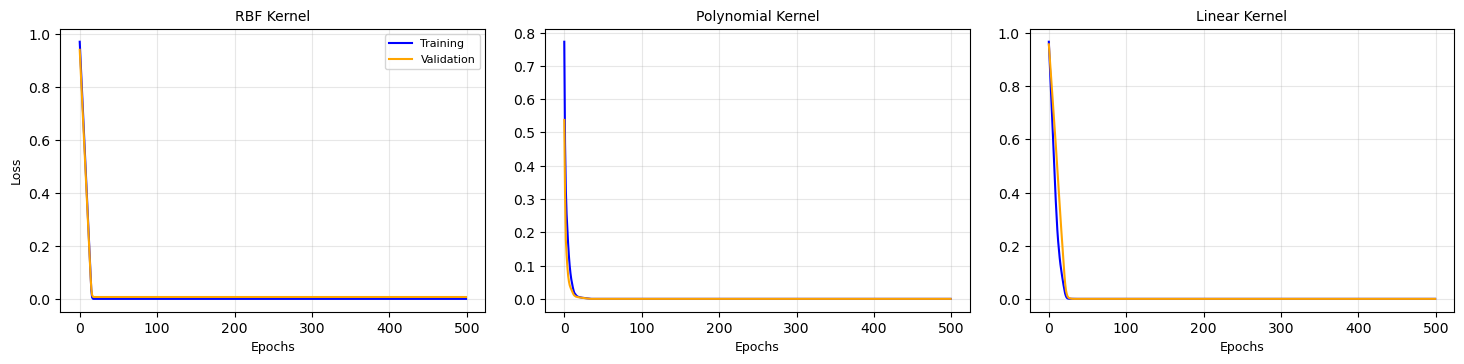

In [92]:
# Create a 1x3 grid of subplots with smaller size
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 4))

#style settings
plot_style = {
    'linewidth': 1.5,
    'grid_alpha': 0.3,
    'title_fontsize': 10,
    'label_fontsize': 9
}

# RBF Kernel Plot
ax1.plot(train_losses_sub_rbf, label='Training', color='blue')
ax1.plot(val_losses_sub_rbf, label='Validation', color='orange')
ax1.set_title('RBF Kernel', fontsize=plot_style['title_fontsize'])
ax1.set_xlabel('Epochs', fontsize=plot_style['label_fontsize'])
ax1.set_ylabel('Loss', fontsize=plot_style['label_fontsize'])
ax1.legend(fontsize=8)
ax1.grid(alpha=plot_style['grid_alpha'])

# Polynomial Kernel Plot
ax2.plot(train_losses_sub_poly, label='Training', color='blue')
ax2.plot(val_losses_sub_poly, label='Validation', color='orange')
ax2.set_title('Polynomial Kernel', fontsize=plot_style['title_fontsize'])
ax2.set_xlabel('Epochs', fontsize=plot_style['label_fontsize'])
ax2.grid(alpha=plot_style['grid_alpha'])

# Linear Kernel Plot
ax3.plot(train_losses_sub_linearb, label='Training', color='blue')
ax3.plot(val_losses_sub_linearb, label='Validation', color='orange')
ax3.set_title('Linear Kernel', fontsize=plot_style['title_fontsize'])
ax3.set_xlabel('Epochs', fontsize=plot_style['label_fontsize'])
ax3.grid(alpha=plot_style['grid_alpha'])

# Adjust layout
plt.tight_layout(pad=2.0)
plt.show()

### Accuarcy curve for train & validation with subgradient optimizer 

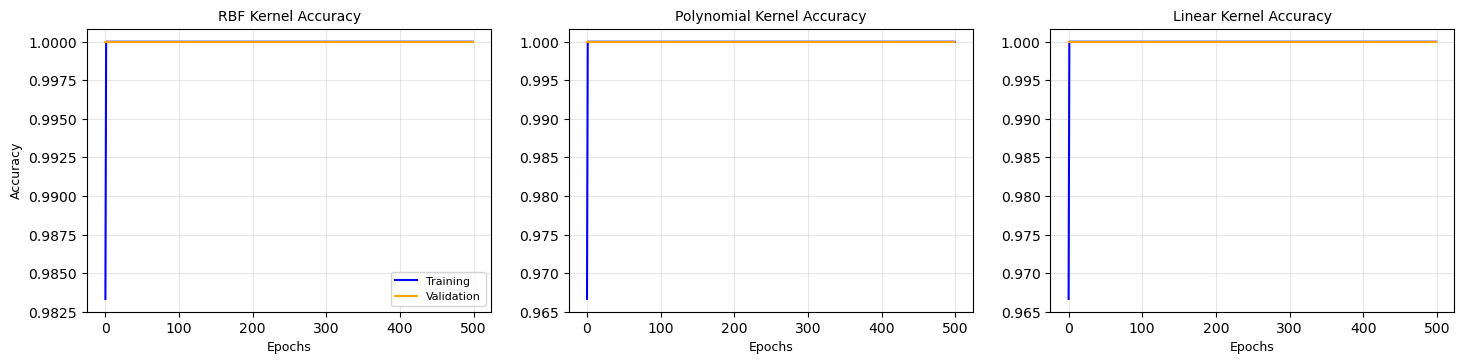

In [93]:
# Create figure
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 4))

# RBF Kernel Accuracy
ax1.plot(train_accuracies_sub_rbf, label='Training', color='blue', linewidth=plot_style['linewidth'])
ax1.plot(val_accuracies_sub_rbf, label='Validation', color='orange', linewidth=plot_style['linewidth'])
ax1.set_title('RBF Kernel Accuracy', fontsize=plot_style['title_fontsize'])
ax1.set_xlabel('Epochs', fontsize=plot_style['label_fontsize'])
ax1.set_ylabel('Accuracy', fontsize=plot_style['label_fontsize'])
ax1.legend(fontsize=8)
ax1.grid(alpha=plot_style['grid_alpha'])

# Polynomial Kernel Accuracy
ax2.plot(train_accuracies_sub_poly, label='Training', color='blue', linewidth=plot_style['linewidth'])
ax2.plot(val_accuracies_sub_poly, label='Validation', color='orange', linewidth=plot_style['linewidth'])
ax2.set_title('Polynomial Kernel Accuracy', fontsize=plot_style['title_fontsize'])
ax2.set_xlabel('Epochs', fontsize=plot_style['label_fontsize'])
ax2.grid(alpha=plot_style['grid_alpha'])

# Linear Kernel Accuracy (with your exact variable name)
ax3.plot(train_accuracies_sub_linearb, label='Training', color='blue', linewidth=plot_style['linewidth'])
ax3.plot(val_accuracies_sub_linearb, label='Validation', color='orange', linewidth=plot_style['linewidth'])
ax3.set_title('Linear Kernel Accuracy', fontsize=plot_style['title_fontsize'])
ax3.set_xlabel('Epochs', fontsize=plot_style['label_fontsize'])
ax3.grid(alpha=plot_style['grid_alpha'])

plt.tight_layout(pad=2.0)
plt.show()

## Training 500 epoch with gradient decsent

In [95]:
svm_gradient = KernelSVM(learning_rate=0.001, optimizer='gradient',kernel_type='rbf')

# Train the model
train_losses_grad_rbf, train_accuracies_grad_rbf, val_accuracies_grad_rbf, val_losses_grad_rbf,test_accuracies_grad_rbf, test_losses_grad_rbf= svm_gradient.fit(x_train, y_train, x_val, y_val, x_test, y_test) 

# Print the epoch-wise info
for epoch in range(svm_gradient.max_iter):
    train_loss_grad_rbf = train_losses_grad_rbf[epoch]
    val_loss_grad_rbf =val_losses_grad_rbf[epoch]
    train_acc_grad_rbf = train_accuracies_grad_rbf[epoch]
    val_acc_grad_rbf = val_accuracies_grad_rbf[epoch] if val_accuracies_grad_rbf is not None else "N/A"
    
    print(f"Epoch {epoch+1} | train_Loss: {train_loss_grad_rbf:.4f} | Train Acc: {train_acc_grad_rbf:.4f} | Val Acc: {val_acc_grad_rbf if val_acc_grad_rbf == 'N/A' else f'{val_acc_grad_rbf:.4f}'} | val loss: {val_loss_grad_rbf if val_acc_grad_rbf == 'N/A' else f'{val_loss_grad_rbf:.4f}'}")



Epoch 1 | train_Loss: 0.9701 | Train Acc: 0.9833 | Val Acc: 1.0000 | val loss: 0.9409
Epoch 2 | train_Loss: 0.9108 | Train Acc: 1.0000 | Val Acc: 1.0000 | val loss: 0.8855
Epoch 3 | train_Loss: 0.8551 | Train Acc: 1.0000 | Val Acc: 1.0000 | val loss: 0.8334
Epoch 4 | train_Loss: 0.8028 | Train Acc: 1.0000 | Val Acc: 1.0000 | val loss: 0.7846
Epoch 5 | train_Loss: 0.7537 | Train Acc: 1.0000 | Val Acc: 1.0000 | val loss: 0.7387
Epoch 6 | train_Loss: 0.7077 | Train Acc: 1.0000 | Val Acc: 1.0000 | val loss: 0.6956
Epoch 7 | train_Loss: 0.6644 | Train Acc: 1.0000 | Val Acc: 1.0000 | val loss: 0.6551
Epoch 8 | train_Loss: 0.6238 | Train Acc: 1.0000 | Val Acc: 1.0000 | val loss: 0.6172
Epoch 9 | train_Loss: 0.5857 | Train Acc: 1.0000 | Val Acc: 1.0000 | val loss: 0.5815
Epoch 10 | train_Loss: 0.5499 | Train Acc: 1.0000 | Val Acc: 1.0000 | val loss: 0.5480
Epoch 11 | train_Loss: 0.5163 | Train Acc: 1.0000 | Val Acc: 1.0000 | val loss: 0.5166
Epoch 12 | train_Loss: 0.4847 | Train Acc: 1.0000 | 

**Gradient with RBF kernel:**

*after 500 epochs, train loss decrased from 0.97 to 0.0001*

*also, validation loss decreased from 0.94 to 0.0095*

*train accuarcy increased from 98.3% to 100%*

*validation accuarcy didn't change (100%)*


In [97]:
svm_gradient = KernelSVM(learning_rate=0.001, optimizer='gradient',kernel_type='linear')

# Train the model
train_losses_grad_linear, train_accuracies_grad_linear, val_accuracies_grad_linear, val_losses_grad_linear,test_accuracies_grad_linear, test_losses_grad_linear= svm_gradient.fit(x_train, y_train, x_val, y_val, x_test, y_test) 

# Print the epoch-wise info
for epoch in range(svm_gradient.max_iter):
    train_loss_grad_linear = train_losses_grad_linear[epoch]
    val_loss_grad_linear =val_losses_grad_linear[epoch]
    train_acc_grad_linear = train_accuracies_grad_linear[epoch]
    val_acc_grad_linear = val_accuracies_grad_linear[epoch] if val_accuracies_grad_linear is not None else "N/A"
    
    print(f"Epoch {epoch+1} | train_Loss: {train_loss_grad_linear:.4f} | Train Acc: {train_acc_grad_linear:.4f} | Val Acc: {val_acc_grad_linear if val_acc_grad_linear == 'N/A' else f'{val_acc_grad_linear:.4f}'} | val loss: {val_loss_grad_linear if val_acc_grad_linear == 'N/A' else f'{val_loss_grad_linear:.4f}'}")



Epoch 1 | train_Loss: 0.9686 | Train Acc: 0.9667 | Val Acc: 1.0000 | val loss: 0.9588
Epoch 2 | train_Loss: 0.9061 | Train Acc: 1.0000 | Val Acc: 1.0000 | val loss: 0.9191
Epoch 3 | train_Loss: 0.8481 | Train Acc: 1.0000 | Val Acc: 1.0000 | val loss: 0.8807
Epoch 4 | train_Loss: 0.7943 | Train Acc: 1.0000 | Val Acc: 1.0000 | val loss: 0.8437
Epoch 5 | train_Loss: 0.7442 | Train Acc: 1.0000 | Val Acc: 1.0000 | val loss: 0.8081
Epoch 6 | train_Loss: 0.6976 | Train Acc: 1.0000 | Val Acc: 1.0000 | val loss: 0.7738
Epoch 7 | train_Loss: 0.6543 | Train Acc: 1.0000 | Val Acc: 1.0000 | val loss: 0.7408
Epoch 8 | train_Loss: 0.6139 | Train Acc: 1.0000 | Val Acc: 1.0000 | val loss: 0.7091
Epoch 9 | train_Loss: 0.5764 | Train Acc: 1.0000 | Val Acc: 1.0000 | val loss: 0.6786
Epoch 10 | train_Loss: 0.5413 | Train Acc: 1.0000 | Val Acc: 1.0000 | val loss: 0.6493
Epoch 11 | train_Loss: 0.5087 | Train Acc: 1.0000 | Val Acc: 1.0000 | val loss: 0.6212
Epoch 12 | train_Loss: 0.4782 | Train Acc: 1.0000 | 

**Gradient with Linear kernel:**

*after 500 epochs, train loss decrased from 0.97 to 0.0*

*also, validation loss decreased from 0.96 to 0.0002*

*train accuarcy increased from 96.7% to 100%*

*validation accuarcy didn't change (100%)*


In [100]:
svm_gradient = KernelSVM(learning_rate=0.001,optimizer='gradient',kernel_type='poly')

# Train the model
train_losses_grad_poly, train_accuracies_grad_poly, val_accuracies_grad_poly, val_losses_grad_poly,test_accuracies_grad_poly, test_losses_grad_poly= svm_gradient.fit(x_train, y_train, x_val, y_val, x_test, y_test) 

# Print the epoch-wise info
for epoch in range(svm_gradient.max_iter):
    train_loss_grad_poly = train_losses_grad_poly[epoch]
    val_loss_grad_poly =val_losses_grad_poly[epoch]
    train_acc_grad_poly = train_accuracies_grad_poly[epoch]
    val_acc_grad_poly = val_accuracies_grad_poly[epoch] if val_accuracies_grad_poly is not None else "N/A"
    
    print(f"Epoch {epoch+1} | train_Loss: {train_loss_grad_poly:.4f} | Train Acc: {train_acc_grad_poly:.4f} | Val Acc: {val_acc_grad_poly if val_acc_grad_poly == 'N/A' else f'{val_acc_grad_poly:.4f}'} | val loss: {val_loss_grad_poly if val_acc_grad_poly == 'N/A' else f'{val_loss_grad_poly:.4f}'}")



Epoch 1 | train_Loss: 0.8088 | Train Acc: 0.9667 | Val Acc: 1.0000 | val loss: 0.6007
Epoch 2 | train_Loss: 0.5662 | Train Acc: 1.0000 | Val Acc: 1.0000 | val loss: 0.4374
Epoch 3 | train_Loss: 0.4563 | Train Acc: 1.0000 | Val Acc: 1.0000 | val loss: 0.3283
Epoch 4 | train_Loss: 0.3812 | Train Acc: 1.0000 | Val Acc: 1.0000 | val loss: 0.2490
Epoch 5 | train_Loss: 0.3297 | Train Acc: 1.0000 | Val Acc: 1.0000 | val loss: 0.2075
Epoch 6 | train_Loss: 0.2930 | Train Acc: 1.0000 | Val Acc: 1.0000 | val loss: 0.1769
Epoch 7 | train_Loss: 0.2632 | Train Acc: 1.0000 | Val Acc: 1.0000 | val loss: 0.1519
Epoch 8 | train_Loss: 0.2389 | Train Acc: 1.0000 | Val Acc: 1.0000 | val loss: 0.1334
Epoch 9 | train_Loss: 0.2184 | Train Acc: 1.0000 | Val Acc: 1.0000 | val loss: 0.1190
Epoch 10 | train_Loss: 0.2018 | Train Acc: 1.0000 | Val Acc: 1.0000 | val loss: 0.1058
Epoch 11 | train_Loss: 0.1867 | Train Acc: 1.0000 | Val Acc: 1.0000 | val loss: 0.0936
Epoch 12 | train_Loss: 0.1728 | Train Acc: 1.0000 | 

**Gradient with Linear Polynomial:**

*after 500 epochs, train loss decrased from 0.81 to 0.0004*

*also, validation loss decreased from 0.6 to 0.0005*

*train accuarcy increased from 96.7% to 100%*

*validation accuarcy didn't change (100%)*


**notice here the loss in both train and validation increses which indicate subgradient is better to use**

### Loss curve for train & validation with gradient optimizer 

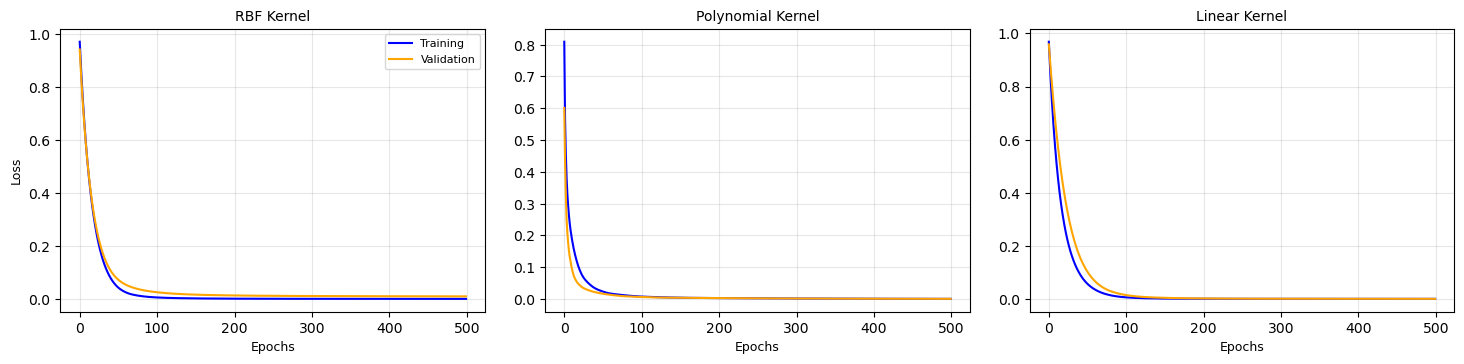

In [102]:
# Create a 1x3 grid of subplots with smaller size
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 4))

#style settings
plot_style = {
    'linewidth': 1.5,
    'grid_alpha': 0.3,
    'title_fontsize': 10,
    'label_fontsize': 9
}

# RBF Kernel Plot
ax1.plot(train_losses_grad_rbf, label='Training', color='blue')
ax1.plot(val_losses_grad_rbf, label='Validation', color='orange')
ax1.set_title('RBF Kernel', fontsize=plot_style['title_fontsize'])
ax1.set_xlabel('Epochs', fontsize=plot_style['label_fontsize'])
ax1.set_ylabel('Loss', fontsize=plot_style['label_fontsize'])
ax1.legend(fontsize=8)
ax1.grid(alpha=plot_style['grid_alpha'])

# Polynomial Kernel Plot
ax2.plot(train_losses_grad_poly, label='Training', color='blue')
ax2.plot(val_losses_grad_poly, label='Validation', color='orange')
ax2.set_title('Polynomial Kernel', fontsize=plot_style['title_fontsize'])
ax2.set_xlabel('Epochs', fontsize=plot_style['label_fontsize'])
ax2.grid(alpha=plot_style['grid_alpha'])

# Linear Kernel Plot
ax3.plot(train_losses_grad_linear, label='Training', color='blue')
ax3.plot(val_losses_grad_linear, label='Validation', color='orange')
ax3.set_title('Linear Kernel', fontsize=plot_style['title_fontsize'])
ax3.set_xlabel('Epochs', fontsize=plot_style['label_fontsize'])
ax3.grid(alpha=plot_style['grid_alpha'])

# Adjust layout
plt.tight_layout(pad=2.0)
plt.show()

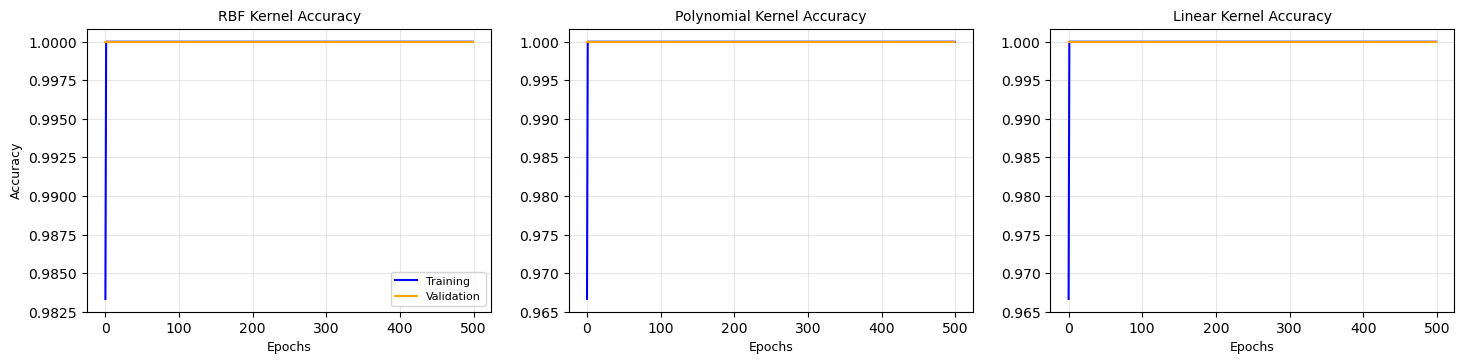

In [104]:
# Create figure
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 4))

# RBF Kernel Accuracy
ax1.plot(train_accuracies_grad_rbf, label='Training', color='blue', linewidth=plot_style['linewidth'])
ax1.plot(val_accuracies_grad_rbf, label='Validation', color='orange', linewidth=plot_style['linewidth'])
ax1.set_title('RBF Kernel Accuracy', fontsize=plot_style['title_fontsize'])
ax1.set_xlabel('Epochs', fontsize=plot_style['label_fontsize'])
ax1.set_ylabel('Accuracy', fontsize=plot_style['label_fontsize'])
ax1.legend(fontsize=8)
ax1.grid(alpha=plot_style['grid_alpha'])

# Polynomial Kernel Accuracy
ax2.plot(train_accuracies_grad_poly, label='Training', color='blue', linewidth=plot_style['linewidth'])
ax2.plot(val_accuracies_grad_poly, label='Validation', color='orange', linewidth=plot_style['linewidth'])
ax2.set_title('Polynomial Kernel Accuracy', fontsize=plot_style['title_fontsize'])
ax2.set_xlabel('Epochs', fontsize=plot_style['label_fontsize'])
ax2.grid(alpha=plot_style['grid_alpha'])

# Linear Kernel Accuracy (with your exact variable name)
ax3.plot(train_accuracies_grad_linear, label='Training', color='blue', linewidth=plot_style['linewidth'])
ax3.plot(val_accuracies_grad_linear, label='Validation', color='orange', linewidth=plot_style['linewidth'])
ax3.set_title('Linear Kernel Accuracy', fontsize=plot_style['title_fontsize'])
ax3.set_xlabel('Epochs', fontsize=plot_style['label_fontsize'])
ax3.grid(alpha=plot_style['grid_alpha'])

plt.tight_layout(pad=2.0)
plt.show()

## model testing with subgradient

In [38]:
svm_subgradient = KernelSVM()

# Train the model
train_losses_sub, train_accuracies_sub, val_accuracies_sub, val_losses_sub,test_accuracies_sub, test_losses_sub= svm_subgradient.fit(x_train, y_train, x_val, y_val, x_test, y_test) 

# Print the epoch-wise info
for epoch in range(svm_subgradient.max_iter):
    test_loss_sub = test_losses_sub[epoch]
    test_acc_sub = test_accuracies_sub[epoch]
    
    print(f"Epoch {epoch+1} | test_Loss: {test_loss_sub:.4f} | Test Acc: {test_acc_sub:.4f} ")



Epoch 1 | test_Loss: 0.9385 | Test Acc: 1.0000 
Epoch 2 | test_Loss: 0.8771 | Test Acc: 1.0000 
Epoch 3 | test_Loss: 0.8156 | Test Acc: 1.0000 
Epoch 4 | test_Loss: 0.7542 | Test Acc: 1.0000 
Epoch 5 | test_Loss: 0.6927 | Test Acc: 1.0000 
Epoch 6 | test_Loss: 0.6313 | Test Acc: 1.0000 
Epoch 7 | test_Loss: 0.5698 | Test Acc: 1.0000 
Epoch 8 | test_Loss: 0.5084 | Test Acc: 1.0000 
Epoch 9 | test_Loss: 0.4469 | Test Acc: 1.0000 
Epoch 10 | test_Loss: 0.3855 | Test Acc: 1.0000 
Epoch 11 | test_Loss: 0.3240 | Test Acc: 1.0000 
Epoch 12 | test_Loss: 0.2626 | Test Acc: 1.0000 
Epoch 13 | test_Loss: 0.2011 | Test Acc: 1.0000 
Epoch 14 | test_Loss: 0.1397 | Test Acc: 1.0000 
Epoch 15 | test_Loss: 0.0782 | Test Acc: 1.0000 
Epoch 16 | test_Loss: 0.0303 | Test Acc: 1.0000 
Epoch 17 | test_Loss: 0.0099 | Test Acc: 1.0000 
Epoch 18 | test_Loss: 0.0052 | Test Acc: 1.0000 
Epoch 19 | test_Loss: 0.0043 | Test Acc: 1.0000 
Epoch 20 | test_Loss: 0.0043 | Test Acc: 1.0000 
Epoch 21 | test_Loss: 0.0043 

**with subgradient, test loss decreased to 0.02**

## Model testing with gradient

In [105]:
svm_gradient = KernelSVM(kernel_type='rbf')

# Train the model
train_losses_grad, train_accuracies_grad, val_accuracies_grad, val_losses_grad,test_accuracies_grad, test_losses_grad= svm_gradient.fit(x_train, y_train, x_val, y_val, x_test, y_test) 

# Print the epoch-wise info
for epoch in range(svm_gradient.max_iter):
    test_acc_grad = test_accuracies_grad[epoch]
    test_loss_grad = test_losses_grad[epoch]

    
    print(f"Epoch {epoch+1} | test_Loss: {test_loss_grad:.4f} | Test Acc: {test_acc_grad:.4f} ")



Epoch 1 | test_Loss: 0.9385 | Test Acc: 1.0000 
Epoch 2 | test_Loss: 0.8771 | Test Acc: 1.0000 
Epoch 3 | test_Loss: 0.8156 | Test Acc: 1.0000 
Epoch 4 | test_Loss: 0.7542 | Test Acc: 1.0000 
Epoch 5 | test_Loss: 0.6927 | Test Acc: 1.0000 
Epoch 6 | test_Loss: 0.6313 | Test Acc: 1.0000 
Epoch 7 | test_Loss: 0.5698 | Test Acc: 1.0000 
Epoch 8 | test_Loss: 0.5084 | Test Acc: 1.0000 
Epoch 9 | test_Loss: 0.4469 | Test Acc: 1.0000 
Epoch 10 | test_Loss: 0.3855 | Test Acc: 1.0000 
Epoch 11 | test_Loss: 0.3240 | Test Acc: 1.0000 
Epoch 12 | test_Loss: 0.2626 | Test Acc: 1.0000 
Epoch 13 | test_Loss: 0.2011 | Test Acc: 1.0000 
Epoch 14 | test_Loss: 0.1397 | Test Acc: 1.0000 
Epoch 15 | test_Loss: 0.0782 | Test Acc: 1.0000 
Epoch 16 | test_Loss: 0.0303 | Test Acc: 1.0000 
Epoch 17 | test_Loss: 0.0099 | Test Acc: 1.0000 
Epoch 18 | test_Loss: 0.0052 | Test Acc: 1.0000 
Epoch 19 | test_Loss: 0.0043 | Test Acc: 1.0000 
Epoch 20 | test_Loss: 0.0043 | Test Acc: 1.0000 
Epoch 21 | test_Loss: 0.0043 

## loss comparasion between train & test and validation while using subgradient and gradient

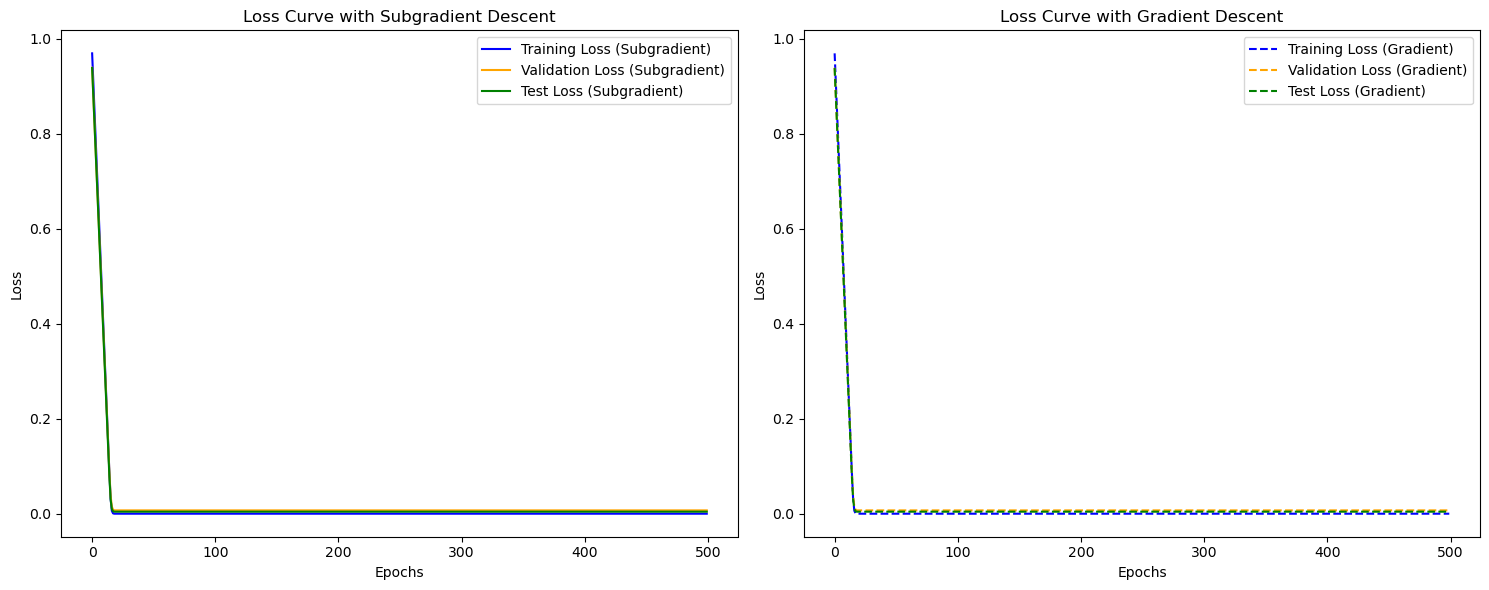

In [106]:
# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Plot the loss curve for Subgradient
ax1.plot(train_losses_sub, label='Training Loss (Subgradient)', color='blue')
ax1.plot(val_losses_sub, label='Validation Loss (Subgradient)', color='orange')
ax1.plot(test_losses_sub, label='Test Loss (Subgradient)', color='green')
ax1.set_title('Loss Curve with Subgradient Descent')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.legend()

# Plot the loss curve for Gradient
ax2.plot(train_losses_grad, label='Training Loss (Gradient)', color='blue', linestyle='--')
ax2.plot(val_losses_grad, label='Validation Loss (Gradient)', color='orange', linestyle='--')
ax2.plot(test_losses_grad, label='Test Loss (Gradient)', color='green', linestyle='--')
ax2.set_title('Loss Curve with Gradient Descent')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Loss')
ax2.legend()

# Show the figure
plt.tight_layout()
plt.show()

## loss comparasion between train & test and validation while using subgradient and gradient

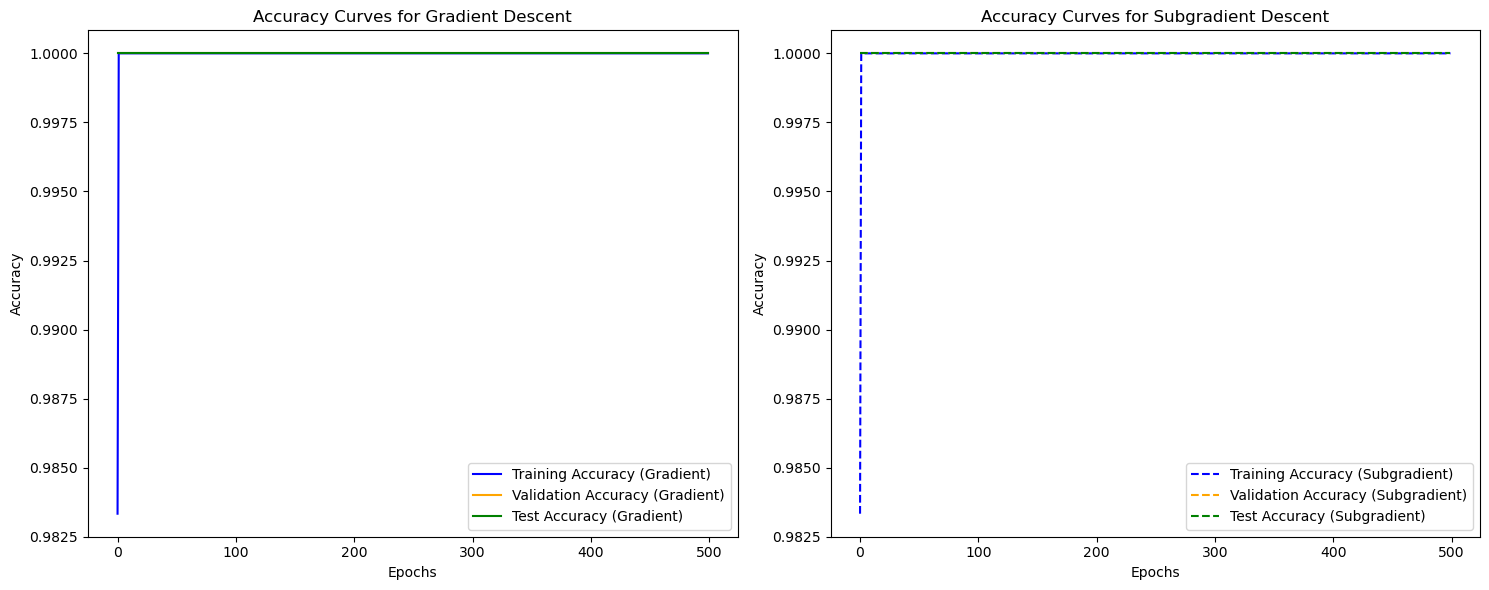

In [108]:
# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Plot the accuracy curves for Gradient Descent
ax1.plot(train_accuracies_grad, label='Training Accuracy (Gradient)', color='blue', linestyle='-')
ax1.plot(val_accuracies_grad, label='Validation Accuracy (Gradient)', color='orange', linestyle='-')
ax1.plot(test_accuracies_grad, label='Test Accuracy (Gradient)', color='green', linestyle='-')
ax1.set_title('Accuracy Curves for Gradient Descent')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Accuracy')
ax1.legend()

# Plot the accuracy curves for Subgradient Descent
ax2.plot(train_accuracies_sub, label='Training Accuracy (Subgradient)', color='blue', linestyle='--')
ax2.plot(val_accuracies_sub, label='Validation Accuracy (Subgradient)', color='orange', linestyle='--')
ax2.plot(test_accuracies_sub, label='Test Accuracy (Subgradient)', color='green', linestyle='--')
ax2.set_title('Accuracy Curves for Subgradient Descent')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.legend()

# Adjust layout and show the figure
plt.tight_layout()
plt.show()


## Confusion matrix 

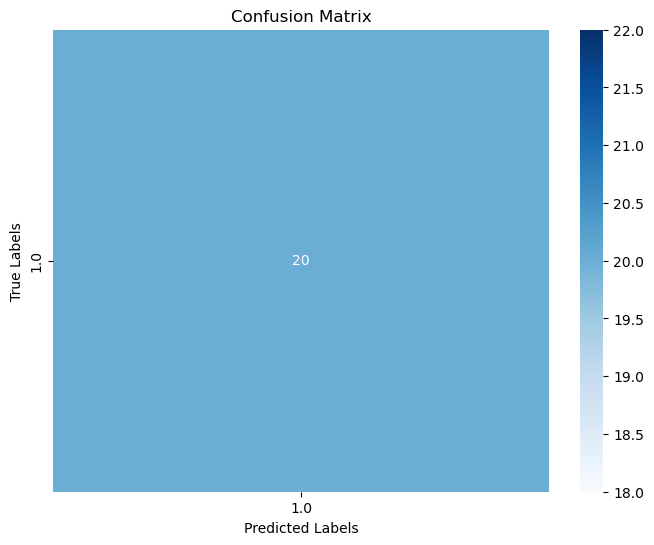

In [109]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Predict and compute the confusion matrix
y_pred = svm_subgradient.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
unique_labels = np.unique(np.concatenate((y_test, y_pred)))

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=unique_labels, yticklabels=unique_labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


In [110]:
# Initialize confusion matrix values
true_positive = sum((y_test == 1) & (svm_subgradient.predict(x_test) == 1))
false_positive = sum((y_test == -1) & (svm_subgradient.predict(x_test) == 1))
false_negative = sum((y_test == 1) & (svm_subgradient.predict(x_test) == -1))

# Calculate precision and recall
precision = true_positive / (true_positive + false_positive) if (true_positive + false_positive) > 0 else 0
recall = true_positive / (true_positive + false_negative) if (true_positive + false_negative) > 0 else 0

print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")

Precision: 1.0000
Recall: 1.0000


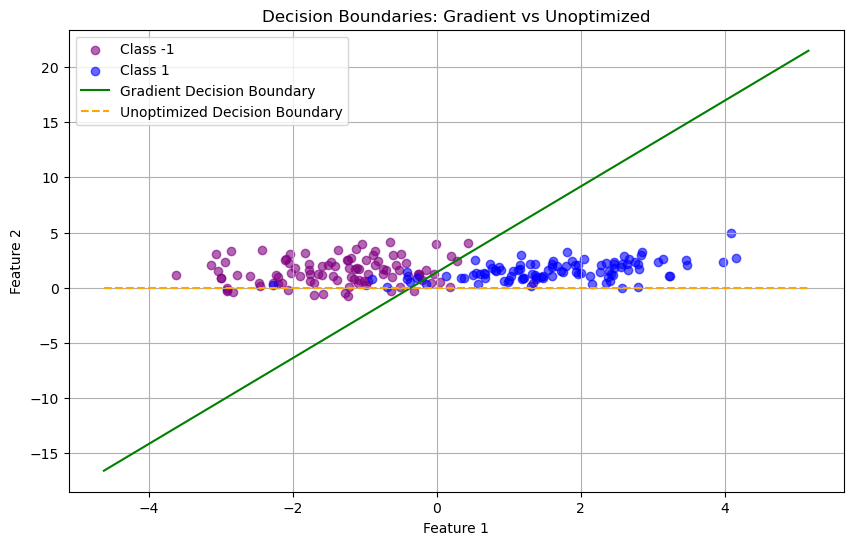

In [111]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import LinearSVC
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

# Generate synthetic binary classification data
x, y = make_classification(n_samples=200, n_features=2, n_redundant=0,
                           n_clusters_per_class=1, class_sep=1.5, random_state=42)
y = np.where(y == 0, -1, 1)  # Convert labels to -1 and 1 for visualization

# Split the data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

# Train Linear SVM (Gradient Optimizer simulation)
svm_gradient = LinearSVC(C=1.0, max_iter=1000)
svm_gradient.fit(x_train, y_train)

# Extract weights and bias for gradient optimizer
w_grad = svm_gradient.coef_[0]
b_grad = svm_gradient.intercept_[0]

# Extract weights and bias for the unoptimized model (assuming initial weights are zeros)
w_unoptimized = np.zeros_like(w_grad)
b_unoptimized = 0

# Plot data points
plt.figure(figsize=(10, 6))
plt.scatter(x[:, 0][y == -1], x[:, 1][y == -1], color='purple', label='Class -1', alpha=0.6)
plt.scatter(x[:, 0][y == 1], x[:, 1][y == 1], color='blue', label='Class 1', alpha=0.6)

# Plot decision boundaries
x1 = np.linspace(x[:, 0].min() - 1, x[:, 0].max() + 1, 200)

# Gradient optimizer boundary
x2_grad = -(w_grad[0] * x1 + b_grad) / w_grad[1]
plt.plot(x1, x2_grad, color='green', label='Gradient Decision Boundary')

# Unoptimized boundary
x2_unoptimized = -(w_unoptimized[0] * x1 + b_unoptimized) / (w_unoptimized[1] + 1e-10)  # Avoid div by zero
plt.plot(x1, x2_unoptimized, color='orange', label='Unoptimized Decision Boundary', linestyle='--')

# Labels and legend
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Decision Boundaries: Gradient vs Unoptimized')
plt.legend()
plt.grid(True)
plt.show()
